<a href="https://colab.research.google.com/github/Soumya164/ML_Project_NYC-Taxi-Trip-Time-Prediction-/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/DataSetAlmabetter/NYC Taxi Data.csv')

In [ ]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
round(df.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,959.0
std,0.0,1.0,0.0,0.0,0.0,0.0,5237.0
min,1.0,0.0,-122.0,34.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,662.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-61.0,52.0,-61.0,44.0,3526282.0


In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


we clearly see trip_duration takes strange values for min and max. Let's have a quick visualization with a boxplot.

**Outlier Visualization**

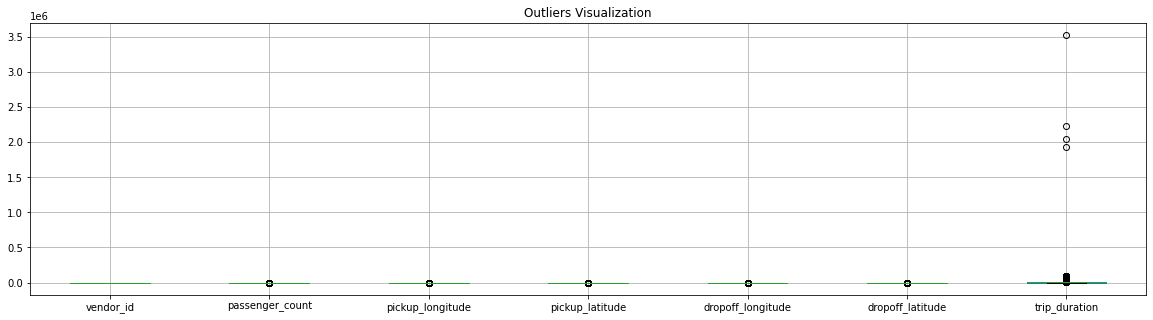

In [ ]:
plt.subplots(figsize = (20, 5))
plt.title("Outliers Visualization")
df.boxplot()

first check what kind of trips durations are present in the dataset. Because of the outliers i decided to go ahead with the log scale

We can convert it to datetime

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [ ]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

In [ ]:
df['pickup_day_no'] = df['pickup_datetime'].dt.weekday
df['dropoff_day_no'] = df['dropoff_datetime'].dt.weekday

In [ ]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [ ]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month

In [ ]:
def time_of_day(x):
  if x in range(6, 12):
    return 'Morning'
  elif x in range(12, 16):
    return 'Afternoon'
  elif x in range(16, 22):
    return 'Evening'
  else:
    return 'Late night'   

In [ ]:
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)

In [ ]:
df['dropoff_timeofday'] = df['dropoff_hour'].apply(time_of_day)

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,distance,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,1.498523,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,1.805510,Late night


Importing the library which lets us calculate distance from geographical coordinates.

In [ ]:
from geopy.distance import great_circle

Create a function to take coordinates as inputs and return us distance.

In [ ]:
def calc_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
  start_coordinates=(pickup_latitude, pickup_longitude)
  stop_coordinates=(dropoff_latitude, dropoff_longitude)
 
  return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
df['distance'] = df.apply(lambda x: calc_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,0,0,17,17,3,3,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,0,0,6,6,Late night,1.805510


Thus, we successfully created some new features which we will analyze in univariate and bivariate analysis.

**Univariate Analysis**

The univariate analysis involves studying patterns of all variables individually.

**Target Variable**

Let us start by analyzing the target variable.

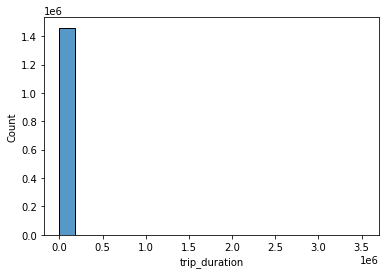

In [ ]:
sns.histplot(df['trip_duration'], kde = False, bins = 20)

Let us also look at the boxplot.

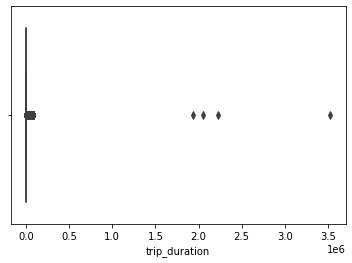

In [ ]:
sns.boxplot(df['trip_duration'])

We can clearly see an outlier.

In [ ]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

We can see that there is an entry which is significantly different from others.

As there is a single row only, let us drop this row.

In [ ]:
df.drop(df[df['trip_duration'] == 3526282].index, inplace = True)

**Vendor id**

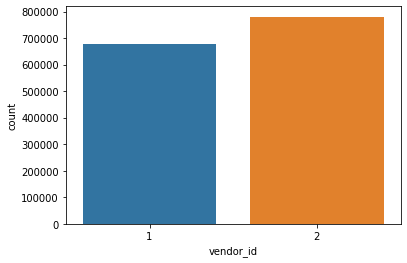

In [ ]:
sns.countplot(df['vendor_id'], data = df)

We see that there is not much difference between the trips taken by both vendors.

**Passenger Count**


In [ ]:
df.passenger_count.value_counts()

1    1033539
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

* There is only 1 trip each for 8 and 9 passengers.

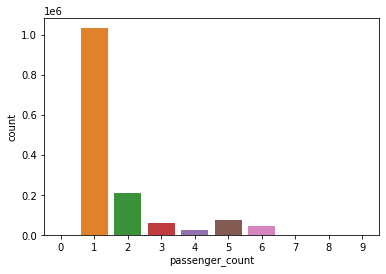

In [ ]:
sns.countplot(df['passenger_count'], data = df)

We see the highest amount of trips are with 1 passenger.
Let us remove the rows which have 0 and 7 and 8 and 9 passenger count.

In [ ]:
df = df[df['passenger_count'] != 0]
df = df[df['passenger_count'] <= 6]

Now, it seems like a fair distribution.

**Store and Forward Flag**

In [ ]:
df['store_and_fwd_flag'].value_counts(normalize = True)

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

Here We clearly see that there are less than 1% of trips that were stored before forwarding.

**Distance**

In [ ]:
df['distance'].value_counts()

0.000000    5887
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
3.231345       1
1.584861       1
0.434274       1
3.809274       1
1.134044       1
Name: distance, Length: 1452308, dtype: int64

We see there are 5887 trips with 0 km distance.

The reasons for 0 km distance can be:

* The dropoff location couldn’t be tracked.


* The driver deliberately took this ride to complete a target ride number.
* The passengers canceled the trip.

We will analyze these trips further in bivariate analysis.

**Trips per Day**

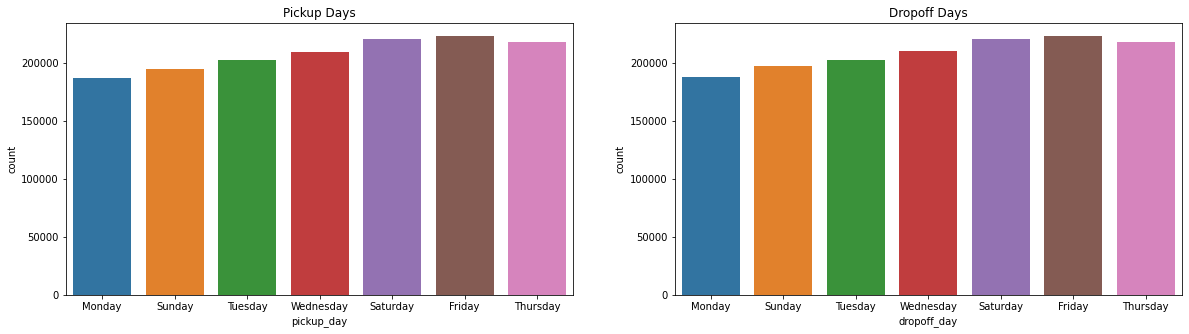

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x = "pickup_day",data = df, ax = ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x = "dropoff_day",data = df, ax = ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend

**Trips per Hour**

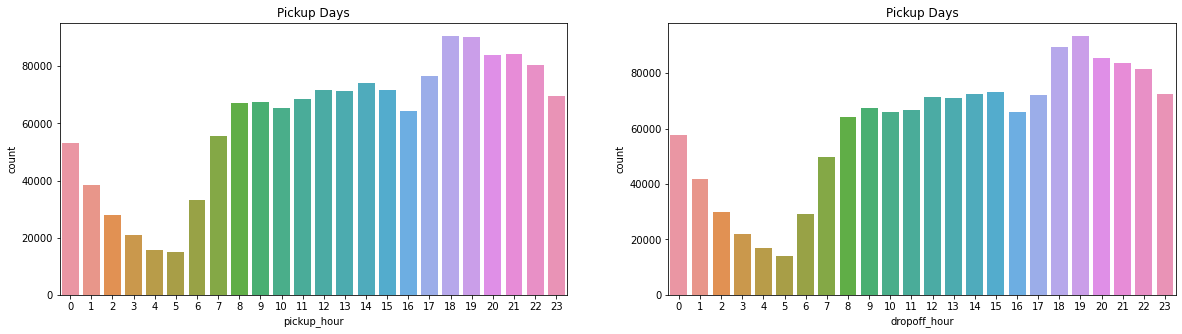

In [ ]:
figure, (ax3, ax4) = plt.subplots(ncols = 2, figsize = (20, 5))

ax3.set_title('Pickup Days')
ax = sns.countplot(df['pickup_hour'], data = df, ax = ax3)

ax4.set_title('Pickup Days')
ax = sns.countplot(df['dropoff_hour'], data = df, ax = ax4)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

**Trips per Time of Day**

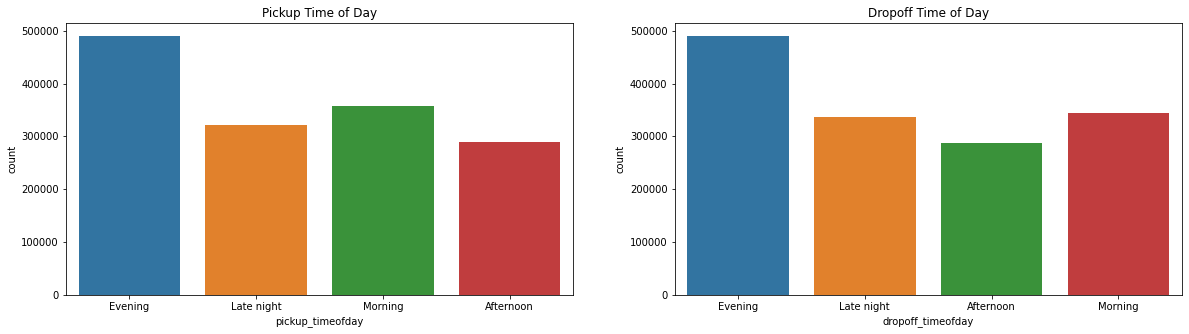

In [ ]:
figure, (ax5, ax6) = plt.subplots(ncols = 2, figsize = (20,5))
ax5.set_title('Pickup Time of Day')
ax = sns.countplot(x = "pickup_timeofday",data = df, ax = ax5)
ax6.set_title('Dropoff Time of Day')
ax = sns.countplot(x = "dropoff_timeofday",data = df,ax = ax6)

As we saw above, evenings are the busiest.

**Trips per month**

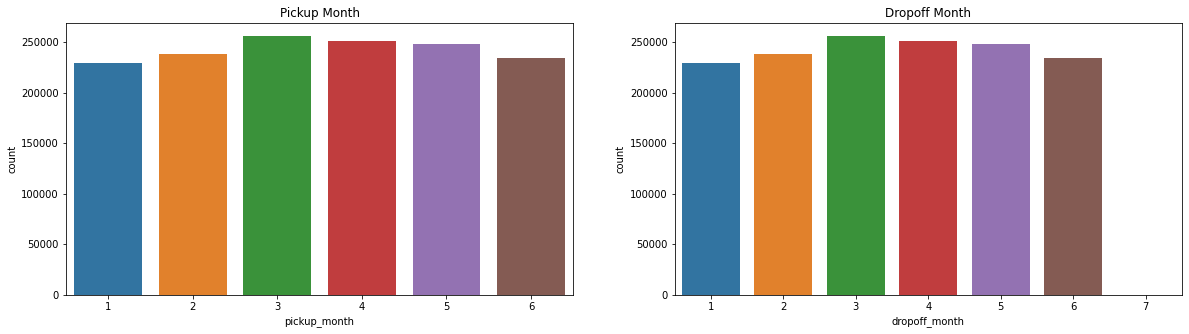

In [ ]:
figure, (ax7,ax8) = plt.subplots(ncols = 2, figsize = (20,5))
ax7.set_title('Pickup Month')
ax = sns.countplot(x = "pickup_month",data = df, ax = ax7)
ax8.set_title('Dropoff Month')
ax = sns.countplot(x = "dropoff_month",data = df, ax = ax8)

There is not much difference in the number of trips across months.

**Now, we will analyze all these variables further in bivariate analysis.**

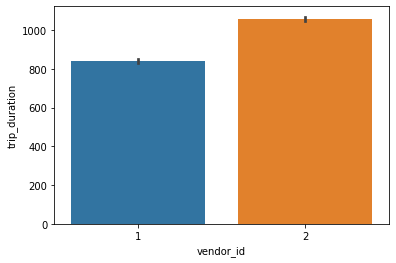

In [ ]:
sns.barplot(y = 'trip_duration', x = 'vendor_id', data = df, estimator = np.mean)

Vendor id 2 takes longer trips as compared to vendor 1.

**Trip Duration per Store and Forward Flag**

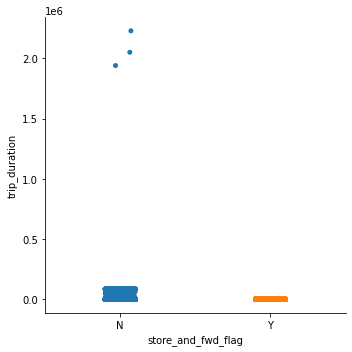

In [ ]:
sns.catplot(y = 'trip_duration',x = 'store_and_fwd_flag', data = df, kind = 'strip')

**Trip Duration per passenger count**

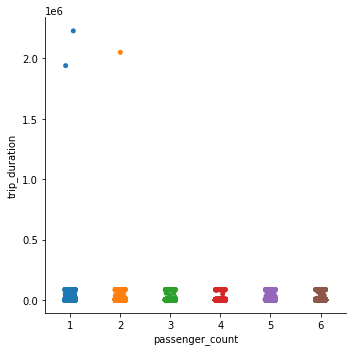

In [ ]:
sns.catplot(y = 'trip_duration', x = 'passenger_count', data = df, kind = 'strip')

There is no visible relation between trip duration and passenger count.

**Trip Duration per hour**

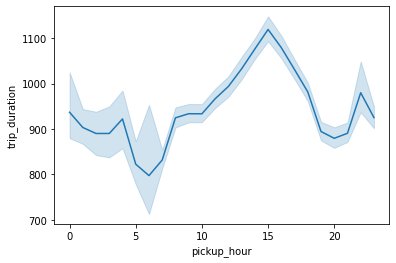

In [ ]:
sns.lineplot(x = 'pickup_hour', y = 'trip_duration', data = df)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

**Trip Duration per time of day**

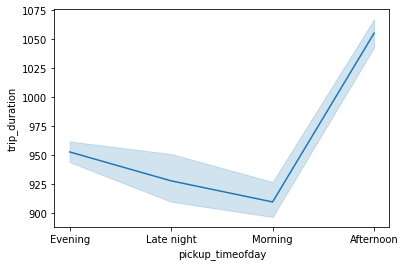

In [ ]:
sns.lineplot(x = 'pickup_timeofday', y = 'trip_duration', data = df)

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning

**Trip Duration per Day of Week**

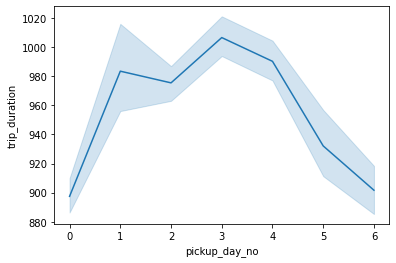

In [ ]:
sns.lineplot(x ='pickup_day_no', y = 'trip_duration', data = df)

Trip duration is the longest on Thursdays closely followed by Fridays.

**Trip Duration per month**

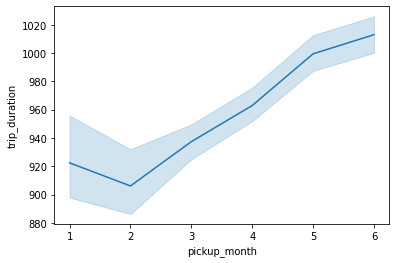

In [ ]:
sns.lineplot(x = 'pickup_month', y = 'trip_duration', data = df)

From February, we can see trip duration rising every month.

**Distance and Vendor**

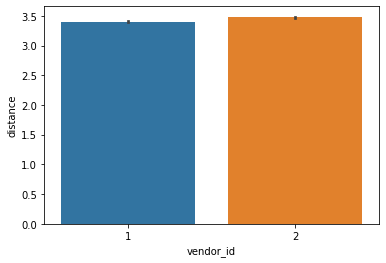

In [ ]:
sns.barplot(y = 'distance', x = 'vendor_id', data = df, estimator=np.mean)

The distribution for both vendors is very similar.

**Distance and Store and Forward Flag**

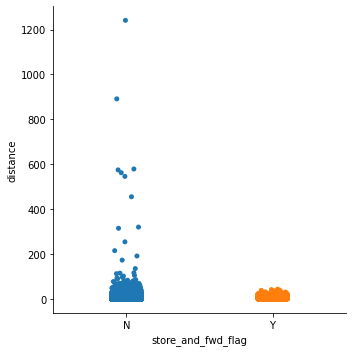

In [ ]:
sns.catplot(y = 'distance', x = 'store_and_fwd_flag', data = df, kind = 'strip')

We see for longer distances the trip is not stored.

**Distance per passenger count**

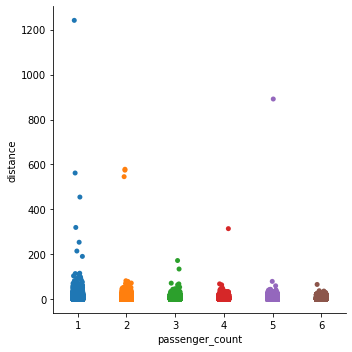

In [ ]:
sns.catplot(y = 'distance', x = 'passenger_count', data = df, kind = 'strip')

We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides

**Distance per day of week**

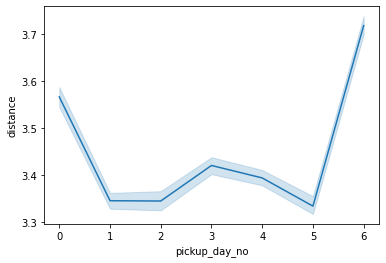

In [ ]:
sns.lineplot(x = 'pickup_day_no', y ='distance',data = df)



* Distances are longer on Sundays probably because it’s weekend.
* Monday trip distances are also quite high.
* This probably means that there can be outstation trips on these days and/or the streets are busier.



**Distance per hour of day**

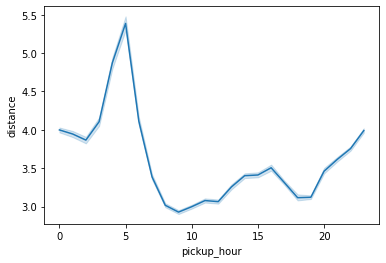

In [ ]:
sns.lineplot(x = 'pickup_hour', y = 'distance', data = df)

Distances are the longest around 5 am.

**Distance per time of day**

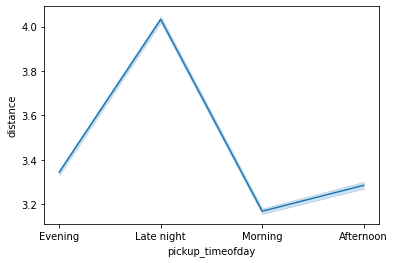

In [ ]:
sns.lineplot(x = 'pickup_timeofday', y = 'distance', data = df)

As seen above also, distances being the longest during late night or it maybe called as early morning too.
This can probably point to outstation trips where people start early for the day.

**Distance per month**

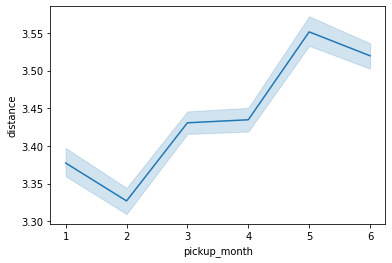

In [ ]:
sns.lineplot(x = 'pickup_month', y = 'distance', data = df)

As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

**Passenger Count and Vendor id**

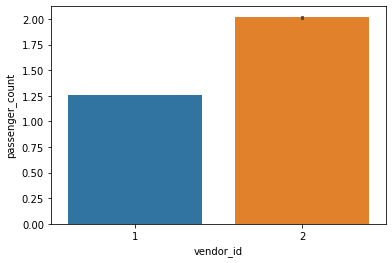

In [ ]:
sns.barplot(y = 'passenger_count', x = 'vendor_id', data = df)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

**Trip Duration and Distance**

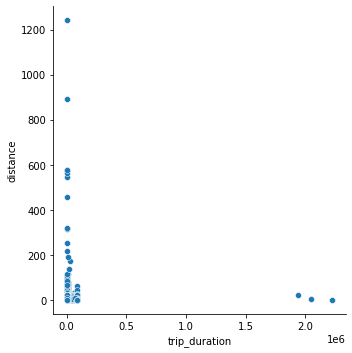

In [ ]:
sns.relplot(y = df.distance, x = 'trip_duration', data = df)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

**Let us see few rows whose distances are 0.**

In [ ]:
df[df['distance'] == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,distance,dropoff_timeofday
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,...,Monday,0,0,18,18,2,2,Evening,0.0,Evening
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,...,Tuesday,1,1,18,18,5,5,Evening,0.0,Evening
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,...,Monday,0,0,23,23,5,5,Late night,0.0,Late night
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,...,Monday,0,0,19,19,1,1,Evening,0.0,Evening
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,Wednesday,2,2,22,22,1,1,Late night,0.0,Late night


In [ ]:
df[df['distance'] == 0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,distance,dropoff_timeofday
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,...,Wednesday,2,2,8,9,2,2,Morning,0.0,Morning
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,...,Saturday,5,5,22,22,2,2,Late night,0.0,Late night
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,...,Saturday,5,5,7,7,3,3,Morning,0.0,Morning
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,...,Saturday,5,5,20,20,4,4,Evening,0.0,Evening
1457136,id1907784,1,2016-03-25 20:06:52,2016-03-25 20:09:48,1,-73.966705,40.769783,-73.966705,40.769783,N,...,Friday,4,4,20,20,3,3,Evening,0.0,Evening


**Conclusion :-**

We can see even though distance is recorded as 0 but trip duration is definitely more.

One reason can be that the dropoff coordinates weren’t recorded.
Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.